In [12]:
import numpy as np
import matplotlib.pyplot as plt
import io
import glob
import seaborn as sns
obj = 'Crab'
run = 'O2_1'
path_objData = '/home/m206265/lalapps_work/data/'+obj+'Data.dat'
pathMetric = '/home/m206265/lalapps_work/FstatMetric_'+run+'.txt'
pathTimeStampsH1 = '/home/m206265/lalapps_work/data/'+run+'_H1_tslist.txt'
pathTimeStampsL1 = '/home/m206265/lalapps_work/data/'+run+'_L1_tslist.txt'


In [18]:
file = io.BytesIO(open(pathMetric, 'rb').read().replace(b';',b','))
gFav = np.genfromtxt(file, skip_header = 40, max_rows = 3, delimiter = ',', usecols = (0,1,2)) # Metric of frequency space
print(gFav)

[[ 1.03949943e+14 -9.86745009e+19  1.28943991e+26]
 [-9.86745009e+19  1.48404767e+26 -1.74367490e+32]
 [ 1.28943991e+26 -1.74367490e+32  2.21636592e+38]]


In [15]:
TimeStampsH1 = np.genfromtxt(pathTimeStampsH1)
TimeStampsL1 = np.genfromtxt(pathTimeStampsL1)
TimeStampsL1H1 = np.concatenate((TimeStampsH1, TimeStampsL1))

Tstart = min(TimeStampsL1H1)
Tend = max(TimeStampsL1H1)
T_obs = (Tend - Tstart)+1800

 # Template grid
df = 1/T_obs  
d1f = 1/T_obs**2
d2f = 1/T_obs**3

 # Offsets
dL = 0.5*df
d1L = 0.5*d1f
d2L = 0.5*d2f
print(dL)

8.878490400931319e-08


 $$ Mismatch: m(\Delta\lambda, \lambda_{sign}) = \frac{\rho^2(0) - \rho^2(\Delta\lambda)}{\rho^2(0)} $$

In [16]:
def MismMetrFun(gFav, dL, d1L, d2L):
    MismMetr = gFav[0,0]*dL**2 + gFav[0,1]*dL*d1L + gFav[0,2]*dL*d2L + gFav[1,0]*d1L*dL+ \
      + gFav[1,1]*d1L**2 + gFav[1,2]*d1L*d2L + gFav[2,0]*d2L*dL + gFav[2,1]*d2L*d1L + gFav[2,2]*d2L**2
    return(MismMetr)

def MismMetr_diagFun(gFav, dL, d1L, d2L):
    MismMetr_diag = gFav[0,0]*dL**2 + gFav[1,1]*d1L**2 + gFav[2,2]*d2L**2
    return(MismMetr_diag)

In [17]:
MismMetr = MismMetrFun(gFav, dL, d1L, d2L)
MismMetr_diag = MismMetr_diagFun(gFav, dL, d1L, d2L)

print(MismMetr)
print(MismMetr_diag)

0.6305052457211808
0.8580355888917752


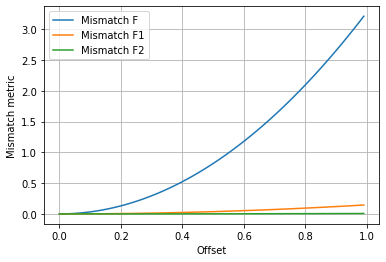

In [6]:
fig, ax = plt.subplots(1,1)

offset = np.arange(0, 1, 0.01)
MismMetr_diagf = MismMetr_diagFun(gFav, offset*df, 0, 0)
ax.plot(offset, MismMetr_diagf, '-', label = 'Mismatch F')

MismMetr_diagf1 = MismMetr_diagFun(gFav, 0, offset*d1f, 0)
ax.plot(offset, MismMetr_diagf1, '-', label = 'Mismatch F1')

MismMetr_diagf2 = MismMetr_diagFun(gFav, 0, 0, offset*d2f)
ax.plot(offset, MismMetr_diagf2, '-', label = 'Mismatch F2')

#ax.plot(offset, gFav[0,0]*(offset*df)**2, 'k.')

ax.set_ylabel('Mismatch metric')
ax.set_xlabel('Offset')
plt.legend()
plt.grid()
plt.show()

We want to set the grid so mismatch in df, d1f and d2f will change similarly due to number of templates

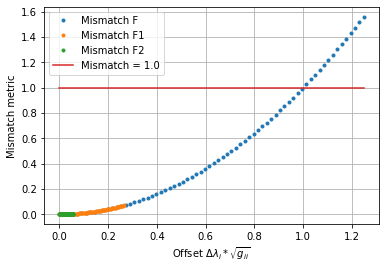

In [7]:
fig, ax = plt.subplots(1,1)

offset = np.arange(0, 0.7, 0.01)
MismMetr_diagf = MismMetr_diagFun(gFav, offset*df, 0, 0)
ax.plot(offset*df*np.sqrt(gFav[0,0]), MismMetr_diagf, '.', label = 'Mismatch F')
#ax.plot(np.sqrt(1.2), 1.2, '*', label = 'dot')


MismMetr_diagf1 = MismMetr_diagFun(gFav, 0, offset*d1f, 0)
ax.plot(offset*d1f*np.sqrt(gFav[1,1]), MismMetr_diagf1, '.', label = 'Mismatch F1')

MismMetr_diagf2 = MismMetr_diagFun(gFav, 0, 0, offset*d2f)
ax.plot(offset*np.sqrt(gFav[2,2])*d2f, MismMetr_diagf2, '.', label = 'Mismatch F2')

ax.plot(offset*df*np.sqrt(gFav[0,0]),np.ones(len(offset)), label = 'Mismatch = 1.0')
ax.set_xlabel(r'Offset $\Delta\lambda_i*\sqrt{g_{ii}}$')
ax.set_ylabel('Mismatch metric')


ax.grid()
ax.legend()
plt.show()

# Set up template grid from the metric

In [8]:
# Target total mismatch
Mmetric = 0.06
Df = 2*np.sqrt(Mmetric/3/gFav[0,0])
D1f = 2*np.sqrt(Mmetric/3/gFav[1,1])
D2f = 2*np.sqrt(Mmetric/3/gFav[2,2])

print('Df/df, D1f/d1f, D2f/d2f')
#print(Df, D1f, D2f)
print(Df/df, D1f/d1f, D2f/d2f)

Df/df, D1f/d1f, D2f/d2f
0.1562297511823196 0.7363475009850411 3.3932580368782825


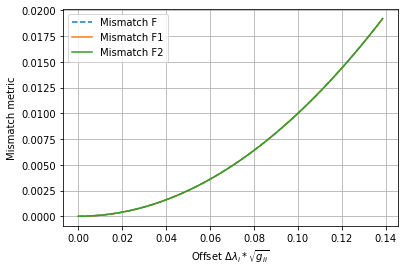

In [9]:
fig, ax = plt.subplots(1,1)

offset = np.arange(0, 0.5, 0.01)
MismMetr_diagf = MismMetr_diagFun(gFav, offset*Df, 0, 0)
ax.plot(offset*Df*np.sqrt(gFav[0,0]), MismMetr_diagf, '--', label = 'Mismatch F')

MismMetr_diagf1 = MismMetr_diagFun(gFav, 0, offset*D1f, 0)
ax.plot(offset*D1f*np.sqrt(gFav[1,1]), MismMetr_diagf1, '-', label = 'Mismatch F1')

MismMetr_diagf2 = MismMetr_diagFun(gFav, 0, 0, offset*D2f)
ax.plot(offset*np.sqrt(gFav[2,2])*D2f, MismMetr_diagf2, '-', label = 'Mismatch F2')

#ax.plot(offset*Df*np.sqrt(gFav[0,0]),np.ones(len(offset)))
ax.set_xlabel(r'Offset $\Delta\lambda_i*\sqrt{g_{ii}}$')
ax.set_ylabel('Mismatch metric')
ax.grid()
ax.legend()
plt.show()

In [10]:
mism_array = np.arange(0, 1.2, 0.01)

fBand = np.sqrt(1.2/gFav[0,0])
f1Band = np.sqrt(1.2/gFav[1,1])
f2Band = np.sqrt(1.2/gFav[2,2])
mism = gFav[0,0]*(fBand)**2
print('mism=', mism)
print('fBand=', fBand, 'f1Band=', f1Band, 'f2Band=', f2Band)
print('Ntempl in f=', fBand/Df, 'Ntempl in f1d=',f1Band/D1f, 'Ntempl in f2d=', f2Band/D2f)
print('Df=', Df, 'Df1=', D1f, 'Df2=', D1f)

#SNR_perfmatched = np.genfromtxt('/home/m206265/lalapps_work/Fstat_nonoise_perfmatched.txt', comments = '%') # rho^2(0)
SNR_offsets = np.genfromtxt('/home/m206265/lalapps_work/SNR_offsets.txt',  comments = '%')

SNR = SNR_offsets[:,6]
f = SNR_offsets[:,0]
f1d = SNR_offsets[:,3]
f2d = SNR_offsets[:,4]

f0_inj = f[0]
f1d_inj = f1d[0]
f2d_inj = f2d[0]

indf0_inj = np.where(f==f0_inj)
indf1d_inj = np.where(f1d==f1d_inj)
indf2d_inj = np.where(f2d==f2d_inj)

ind_intersect = np.intersect1d(indf1d_inj, indf2d_inj)
f_fixed_inj = f[ind_intersect]


mism= 1.2
fBand= 1.0744309145329032e-07 f1Band= 8.992215309216615e-14 f2Band= 7.358171253756612e-20
Ntempl in f= 3.872983346207417 Ntempl in f1d= 3.872983346207417 Ntempl in f2d= 3.872983346207416
Df= 2.7741686924242257e-08 Df1= 2.321780009207155e-14 Df2= 2.321780009207155e-14


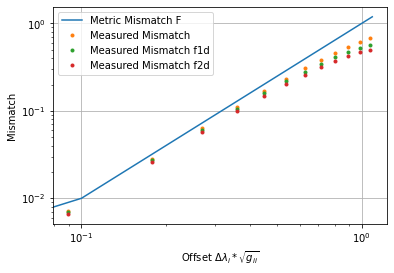

In [11]:
fig, ax = plt.subplots(1,1)
# Offset in frequency only
ind_intersect = np.intersect1d(indf1d_inj, indf2d_inj)
ind_intersectf1d = np.intersect1d(indf0_inj, indf2d_inj)
ind_intersectf2d = np.intersect1d(indf0_inj, indf1d_inj)

f_fixed_inj = f[ind_intersect]
f1d_fixed_inj = f1d[ind_intersectf1d]
f2d_fixed_inj = f2d[ind_intersectf2d]

mismatch = (SNR[0] - SNR[ind_intersect])/SNR[0]
mismatch_f1d = (SNR[0] - SNR[ind_intersectf1d])/SNR[0]
mismatch_f2d = (SNR[0] - SNR[ind_intersectf2d])/SNR[0]

offset_f = np.sqrt(mism_array/gFav[0,0])
MismMetr_diagf = MismMetr_diagFun(gFav, offset_f, 0, 0)
ax.plot(offset_f*np.sqrt(gFav[0,0]), MismMetr_diagf, '-', label = 'Metric Mismatch F')

ax.plot((f_fixed_inj-f0_inj)*np.sqrt(gFav[0,0]), mismatch, '.', label = 'Measured Mismatch')
ax.plot((f1d_fixed_inj-f1d_inj)*np.sqrt(gFav[1,1]), mismatch_f1d, '.', label = 'Measured Mismatch f1d')
ax.plot((f2d_fixed_inj-f2d_inj)*np.sqrt(gFav[2,2]), mismatch_f2d, '.', label = 'Measured Mismatch f2d')

#ax.plot(offset*Df*np.sqrt(gFav[0,0]),np.ones(len(offset)))
ax.set_xlabel(r'Offset $\Delta\lambda_i*\sqrt{g_{ii}}$')
ax.set_ylabel('Mismatch')
ax.grid()
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [12]:
filenames06 = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/mism6/SNR_GridLoud_mism6*.txt')
data06 = np.array([np.genfromtxt(fname=f, comments = '%') for f in filenames06])
filenames06_old = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/SNR_GridLoud_mism06*.txt')
data06_old = np.array([np.genfromtxt(fname=f, comments = '%') for f in filenames06_old])
filenames10 = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/mism10/SNR_GridLoud_mism10*.txt')
data10 = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames10])
filenames1 = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/mism1/SNR_GridLoud_mism1*.txt')
data1 = np.array([np.genfromtxt(fname=f, comments = '%') for f in filenames1])
filenames25 = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/mism25/SNR_GridLoud_mism25*.txt')
data25 = np.array([np.genfromtxt(fname=f, comments = '%') for f in filenames25])
filenames50 = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/mism50/SNR_GridLoud_mism50*.txt')
data50 = np.array([np.genfromtxt(fname=f, comments = '%') for f in filenames50])


print(len(filenames06))
result06 = data06[:,[0,3,4,6]]
result06_old = data06_old[:,[0,3,4,6]]

result10 = data10[:,[0,3,4,6]]
result1 = data1[:,[0,3,4,6]]
result50 = data50[:,[0,3,4,6]]
result25 = data25[:,[0,3,4,6]]

100


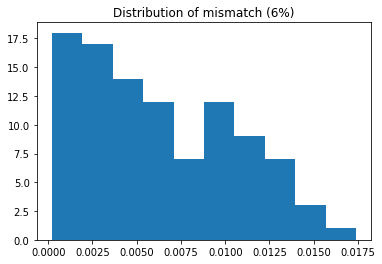

In [13]:
fig, ax1 = plt.subplots(1,1)
mismatch06 = (SNR[0] - result06[:, 3])/SNR[0]
mismatch06_old = (SNR[0] - result06_old[:, 3])/SNR[0]

mismatch10 = (SNR[0] - result10[:, 3])/SNR[0]
mismatch1 = (SNR[0] - result1[:, 3])/SNR[0]
mismatch25 = (SNR[0] - result25[:, 3])/SNR[0]
mismatch50 = (SNR[0] - result50[:, 3])/SNR[0]

ax1.hist(mismatch06)
plt.title('Distribution of mismatch (6%)')
plt.show()


In [14]:
MismComp_mean06 = np.mean(mismatch06)
print('mismatch = 6%:', MismComp_mean06)
MismComp_mean10 = np.mean(mismatch10)
print('mismatch = 10%:',MismComp_mean10)
MismComp_mean06_old = np.mean(mismatch06_old)
print('mismatch = 6% (old) :',MismComp_mean06_old)
MismComp_mean1 = np.mean(mismatch1)
print('mismatch = 1%:',MismComp_mean1)
MismComp_mean25 = np.mean(mismatch25)
print('mismatch = 25%:',MismComp_mean25)
MismComp_mean50 = np.mean(mismatch50)
print('mismatch = 50%:',MismComp_mean50)

K06 = np.sqrt(0.06)/np.sqrt(MismComp_mean06)
print('K06', K06)

K06_old = np.sqrt(0.06)/np.sqrt(MismComp_mean06_old)
print('K06_old', K06_old)

K10 = np.sqrt(0.1)/np.sqrt(MismComp_mean10)
print('K10', K10)

K1 = np.sqrt(0.01)/np.sqrt(MismComp_mean1)
print('K1', K1)

K25 = np.sqrt(0.25)/np.sqrt(MismComp_mean25)
print('K25', K25)

K50 = np.sqrt(0.5)/np.sqrt(MismComp_mean50)
print('K50', K50)

print(Mmetric/MismComp_mean06)
print(0.1/MismComp_mean10)

mismatch = 6%: 0.006315269915024123
mismatch = 10%: 0.012798987775167539
mismatch = 6% (old) : 0.008269311443526417
mismatch = 1%: 0.001279052695916623
mismatch = 25%: 0.029869226307874606
mismatch = 50%: 0.05913965587846125
K06 3.0823337858045634
K06_old 2.693648671734788
K10 2.795195496180661
K1 2.796119841406834
K25 2.8930638433722016
K50 2.907673280467428
9.500781567112291
7.813117861868651


-2.148939960825519
2.8930638433722016 2.907673280467428
0.029869226307874606 0.02956982793923062
0.11808286363784617


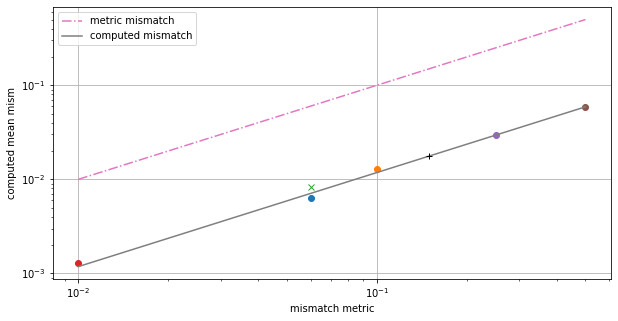

In [60]:
fig,ax = plt. subplots(figsize = (10,5))

ax.plot(0.06, MismComp_mean06, 'o')
ax.plot(0.1, MismComp_mean10, 'o')
ax.plot(0.06, MismComp_mean06_old, 'x')
ax.plot(0.01, MismComp_mean1, 'o')
ax.plot(0.25, MismComp_mean25, 'o')
ax.plot(0.50, MismComp_mean50, 'o')

array_mism = np.array([0.01, 0.5])
ax.plot(array_mism, array_mism, '-.' , label = 'metric mismatch')

k = -(MismComp_mean50 - MismComp_mean1)/(0.01-0.5)
b = 0 #-(MismComp_mean1*0.5 - MismComp_mean50*0.01)/(0.01-0.5)
ax.plot(array_mism, k*array_mism+b, label = 'computed mismatch')
ax.grid()
ax.set_yscale('log')
ax.set_xscale('log')

coeff_to_K = np.log10(0.5)-np.log10(MismComp_mean50)
print(np.log10(0.06) - coeff_to_K)
print( K25, np.sqrt(0.25)/np.sqrt(10**(np.log10(0.25)-coeff_to_K)))
print( MismComp_mean25, 10**(np.log10(0.25)-coeff_to_K))
ax.plot(0.15,  10**(np.log10(0.15)-coeff_to_K), 'k+')
print(k)
ax.set_ylabel('computed mean mism')
ax.set_xlabel('mismatch metric')
ax.legend()
plt.savefig('mismmetric-to-compmeanmism.png')

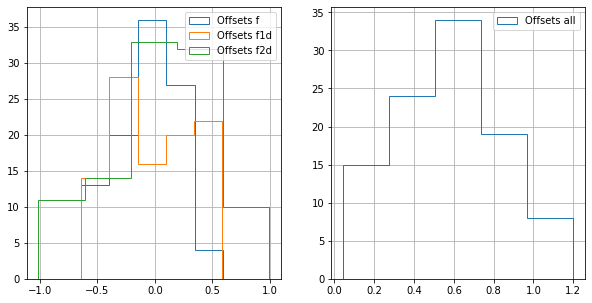

In [16]:
fig, (ax, ax2) = plt.subplots(figsize = (10,5), nrows = 1, ncols =2)

Mmetric = 0.06
Df = 2*np.sqrt(Mmetric/3/gFav[0,0])
D1f = 2*np.sqrt(Mmetric/3/gFav[1,1])
D2f = 2*np.sqrt(Mmetric/3/gFav[2,2])

offsets_f0 = (result06[:, 0]-f0_inj)/Df
ax.hist(offsets_f0, bins = 5, histtype = 'step', label = 'Offsets f')

offsets_f1 = (result06[:,1]-f1d_inj)/D1f
ax.hist(offsets_f1, bins = 5, histtype = 'step', label = 'Offsets f1d')

offsets_f2 = (result06[:, 2]-f2d_inj)/D2f
ax.hist(offsets_f2, bins = 5,histtype =  'step', label = 'Offsets f2d')

offsets = np.sqrt(offsets_f0**2+offsets_f1**2+offsets_f2**2)
ax2.hist(offsets, bins = 5, histtype = 'step', label = 'Offsets all')

ax.legend()
ax2.legend()
ax.grid()
ax2.grid()
plt.show()
#print(result06[:, 0])
#print(offsets)



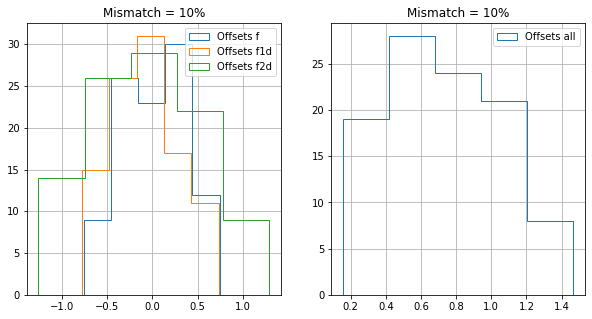

In [17]:
fig, (ax, ax2) = plt.subplots(figsize = (10,5), nrows = 1, ncols =2)

Mmetric = 0.06
Df = 2*np.sqrt(Mmetric/3/gFav[0,0])
D1f = 2*np.sqrt(Mmetric/3/gFav[1,1])
D2f = 2*np.sqrt(Mmetric/3/gFav[2,2])

offsets_f0 = (result10[:, 0]-f0_inj)/Df
ax.hist(offsets_f0, bins = 5, histtype = 'step', label = 'Offsets f')

offsets_f1 = (result10[:,1]-f1d_inj)/D1f
ax.hist(offsets_f1, bins = 5, histtype = 'step', label = 'Offsets f1d')

offsets_f2 = (result10[:, 2]-f2d_inj)/D2f
ax.hist(offsets_f2, bins = 5,histtype =  'step', label = 'Offsets f2d')

offsets = np.sqrt(offsets_f0**2+offsets_f1**2+offsets_f2**2)
ax2.hist(offsets, bins = 5, histtype = 'step', label = 'Offsets all')

ax.legend()
ax2.legend()
ax.grid()
ax2.grid()

ax.set_title('Mismatch = 10%')
ax2.set_title('Mismatch = 10%')

plt.show()
#print(result10[:, 0])
#print(offsets)



## Modified grid

Let's modify our grid and increase offsets by K times - grid will be more scarce

$
d\lambda^i (m^l_*, \tau_{obs}) = \frac{1}{K} \delta f^*_{mtr}(m^{diag}_{mtr}=m^l_*, \tau_{obs}) \\
K = \frac{\delta f}{d \lambda^i} = \frac{\sqrt{0.06}}{\sqrt{m_{meas}}}
$

In [ ]:
K = np.sqrt(0.06)/np.sqrt(MismComp_mean06) # coefficient to a new grid
print(K)

dl = K*Df
d1l = K*D1f
d2l = K*D2f

print(dl)
#print(np.sqrt(MismComp_mean20)/np.sqrt(0.2))

In [ ]:
K = np.sqrt(0.06)/np.sqrt(MismComp_mean06) # coefficient to a new grid
print(K)

dl = K*Df
d1l = K*D1f
d2l = K*D2f

In [ ]:
filenames06_modif = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/mism6/SNR_GridLoud_modif6*.txt')
data06_modif = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames06_modif])

result06_modif = data06_modif[:,[0,3,4,6]]
mismatch06_modif = (SNR[0] - result06_modif[:, 3])/SNR[0]
MismComp_mean06_modif = np.mean(mismatch06_modif)

print('mismatch_modif = 6%:', MismComp_mean06_modif)
filenames10_modif = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid/mism10/SNR_GridLoud_modif10*.txt')
data10_modif = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames10_modif])
result10_modif = data10_modif[:,[0,3,4,6]]
mismatch10_modif = (SNR[0] - result10_modif[:, 3])/SNR[0]
MismComp_mean10_modif = np.mean(mismatch10_modif)

print('mismatch_modif = 10%:', MismComp_mean10_modif)

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (10,5), nrows = 1, ncols =4)

Mmetric = 0.06
Df = K*2*np.sqrt(Mmetric/3/gFav[0,0])
D1f = K*2*np.sqrt(Mmetric/3/gFav[1,1])
D2f = K*2*np.sqrt(Mmetric/3/gFav[2,2])

offsets_f0 = (result06_modif[:, 0]-f0_inj)/Df
ax1.hist(offsets_f0)

offsets_f1 = (result06_modif[:,1]-f1d_inj)/D1f
ax2.hist(offsets_f1)

offsets_f2 = (result06_modif[:, 2]-f2d_inj)/D2f
ax3.hist(offsets_f2)

offsets = np.sqrt(offsets_f0**2+offsets_f1**2+offsets_f2**2)
ax4.hist(offsets)

In [ ]:
filenames06_Noise = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid_Noise_modif/mism6/SNR_GridLoud_modif6_??.txt')
filenames06_Noise_perfmatched = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid_Noise_modif/mism6/SNR_GridLoud_modif6_??_perfmatched.txt')

data06_Noise = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames06_Noise])
data06_Noise_perfmatched = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames06_Noise_perfmatched])

result06_Noise = data06_Noise[:,[0,3,4,6]]
result06_Noise_perfmatched = data06_Noise_perfmatched[:,[0,3,4,6]]

mismatch06_Noise = (result06_Noise_perfmatched[:, 3] - result06_Noise[:, 3])/(result06_Noise_perfmatched[:, 3] + 4) # k + lambda, k - deg of freedom, lambda - noncentrality parameter

MismComp_mean06_Noise = np.mean(abs(mismatch06_Noise))
print('Target mismatch 6%, computed mean:', MismComp_mean06_Noise)
#print(result06_Noise[:, 3])

#K = np.sqrt(0.06)/np.sqrt(abs(MismComp_mean06_Noise))
#print(K)

fig, ax1 = plt.subplots(figsize = (10,5), nrows = 1, ncols =1)
ax1.hist(mismatch06_Noise, edgecolor = 'k', bins = 25)
ax1.axvline(MismComp_mean06_Noise, color = 'r', label = f'mean m = {round(MismComp_mean06_Noise*100,1)}%')
ax1.set_xlabel('mismatch')
ax1.set_title('Mismatch distribution in noise for J0534+2200 (Crab), O2.1 run')
ax1.grid()
ax1.legend()

plt.savefig('mism_w_noise_crab6.pdf')

In [ ]:
filenames10_Noise = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid_Noise_modif/mism10/SNR_GridLoud_modif10_??.txt')
filenames10_Noise_perfmatched = glob.glob('/home/m206265/lalapps_work/mismatchNewGrid_Noise_modif/mism10/SNR_GridLoud_modif10_??_perfmatched.txt')

data10_Noise = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames10_Noise])
data10_Noise_perfmatched = np.array([np.loadtxt(fname=f, comments = '%') for f in filenames10_Noise_perfmatched])

result10_Noise = data10_Noise[:,[0,3,4,6]]
result10_Noise_perfmatched = data10_Noise_perfmatched[:,[0,3,4,6]]

mismatch10_Noise = (result10_Noise_perfmatched[:, 3] - result10_Noise[:, 3])/(result10_Noise_perfmatched[:, 3] + 4) # k + lambda, k - deg of freedom, lambda - noncentrality parameter

MismComp_mean10_Noise = np.mean(abs(mismatch10_Noise))
print('Target mismatch 10%, computed mean:', MismComp_mean10_Noise)
#print(result10_Noise[:, 3])

#K = np.sqrt(0.10)/np.sqrt(abs(MismComp_mean10_Noise))
#print(K)

fig, ax1 = plt.subplots(figsize = (10,5), nrows = 1, ncols =1)
ax1.hist(mismatch10_Noise, edgecolor = 'k', bins = 25)
ax1.axvline(MismComp_mean10_Noise, color = 'r', label = f'mean m = {round(MismComp_mean10_Noise*100,1)}%')
ax1.set_xlabel('mismatch')
ax1.set_title('Mismatch distribution in noise for J0534+2200 (Crab), O2.1 run')
ax1.grid()
ax1.legend()

plt.savefig('mism_w_noise_crab10.pdf')